# プロット改良

In [1]:
import cdflib
import pytplot
from pytplot import data_quants
import pyspedas
import xarray as xr
import numpy as np
import pandas as pd
from scipy.ndimage import uniform_filter1d, median_filter, gaussian_filter
import matplotlib.pyplot as plt
import pywt
from scipy.signal import wiener, savgol_filter


# ファイル名
file_path_1 = "it_h1_hf_20220613_v01.cdf"


# CDFファイルに含まれる変数の情報を取得
# variables_info = cdf_file.cdf_info()
# print(variables_info['zVariables'])
# -> ['Epoch', 'Frequency', 'RH', 'LH']


# CDFファイルを開く
cdf_file = cdflib.CDF(file_path_1)
# CDFファイルの読み込み
pytplot.cdf_to_tplot(file_path_1)

#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
time = data_quants["LH"]['time']
data = data_quants["LH"]
# data_R = data_quants["RH"]


In [3]:
# def variables_show(file_path):
#     # ファイルのパス
#     # file_path_1 = 'hf_20220417.cdf'

#     # CDFファイルを開く
#     cdf_file = cdflib.CDF(file_path)

#     # CDFファイルに含まれる変数の情報を取得
#     variables_info = cdf_file.cdf_info()

#     z_value = variables_info.zVariables
#     print(f"zVariables: {z_value}")
#     print("\n")
    
    
#     # var_name_show = variables_info['zVariables']
#     for i in range(len(z_value)):
#         print(f"Variable: {z_value[i]}")

#         # # 変数の属性を取得
#         # var_attributes = cdf_file.varattsget(variables_info['zVariables'][i])
#         print(f"Attributes: {cdf_file.varattsget(z_value[i])}")

#         #変数のデータを取得
#         var_data_show = cdf_file.varget(z_value[i])
#         print(f"Data: {cdf_file.varget(z_value[i])}")
        
#         # 変数のタイプ
#         print(f"Type: {type(cdf_file.varget(z_value[i]))}")
        
#         # 変数の次元数
#         print(f"Dimension: {cdf_file.varget(z_value[i]).ndim}")
        
#         # 変数のサイズ
#         print(f"Shape: {cdf_file.varget(z_value[i]).shape}")
        
#         # 変数の全要素数
#         print(f"Size: {cdf_file.varget(z_value[i]).size}")
        
        
#         print("-----------")
        
        
# variables_show(file_path_1)

zVariables: ['Epoch', 'Frequency', 'RH', 'LH']


Variable: Epoch
Attributes: {'CATDESC': 'Time (UT)', 'DISPLAY_TYPE': ' ', 'FIELDNAM': 'Epoch', 'FILLVAL': np.float64(-1e+31), 'LABLAXIS': 'Epoch', 'UNITS': 's', 'VALIDMIN': np.float64(62766835200000.0), 'VALIDMAX': np.float64(63745056000000.0), 'VAR_TYPE': 'support_data', 'SCALETYP': 'Linear', 'MONOTON': 'INCREASE', 'DICT_KEY': 'time>Epoch'}
Data: [6.38222976e+13 6.38222976e+13 6.38222976e+13 ... 6.38223840e+13
 6.38223840e+13 6.38223840e+13]
Type: <class 'numpy.ndarray'>
Dimension: 1
Shape: (86400,)
Size: 86400
-----------
Variable: Frequency
Attributes: {'CATDESC': 'Frequency', 'DISPLAY_TYPE': ' ', 'FIELDNAM': 'Frequency', 'FILLVAL': np.float32(-1000000000000000.0), 'FORMAT': 'E9.3', 'LABLAXIS': 'frequency', 'UNITS': 'Hz', 'VALIDMIN': np.float32(15000000.0), 'VALIDMAX': np.float32(40000000.0), 'VAR_TYPE': 'support_data', 'SCALETYP': 'log', 'MONOTON': 'INCREASE'}
Data: [13793945. 13824463. 13854980. 13885498. 13916016. 13946533. 1397705

15 MHz = n_min = 40 (15014648)

20 MHz = n_min = 203 (19989014)

25 MHz = n_min = 367 (24993896)

30 MHz = n_max = 532 (29998780)

35 MHz = n_max = 696 (35003664)

40 MHz = n_max = 860 (40008544)

5MHz間で 163-165bin

## ALL

n_min = 0 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(13793945., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.379e+07
    v          float32 4B 1.379e+07 

n_max = 900 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(41229248., dtype=float32)
Coordinates:
    spec_bins  float32 4B 4.123e+07
    v          float32 4B 4.123e+07 
 ---------------------------------- 



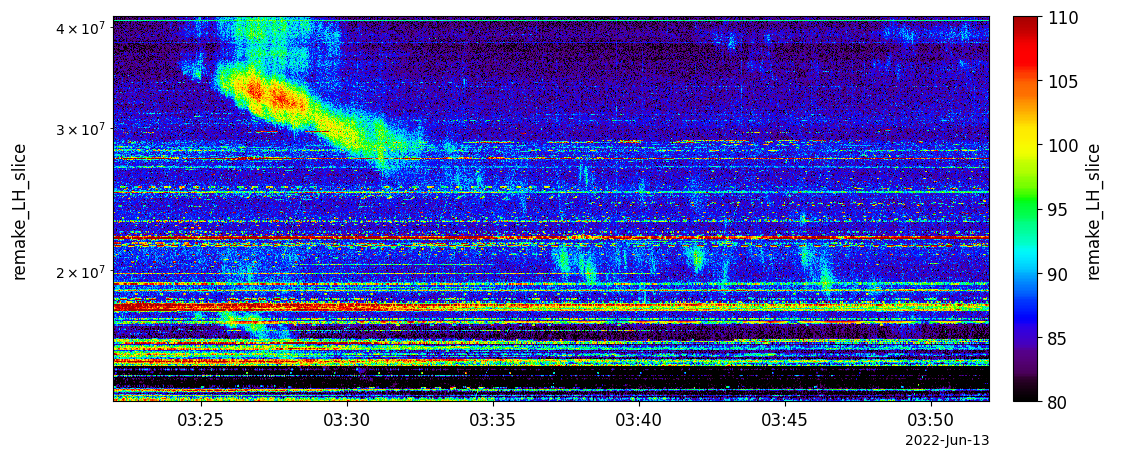

In [2]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))

print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[80, 110]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:22:00", "2022-06-13 03:52:00")
pytplot.tplot('remake_LH_slice')

## Harmonic

## LH

n_min = 380 = <xarray.DataArray 'spec_bins' ()>
array(25390624., dtype=float32)
Coordinates:
    spec_bins  float32 2.539e+07
    v          float32 2.539e+07 

n_max = 800 = <xarray.DataArray 'spec_bins' ()>
array(38177492., dtype=float32)
Coordinates:
    spec_bins  float32 3.818e+07
    v          float32 3.818e+07 
 ---------------------------------- 



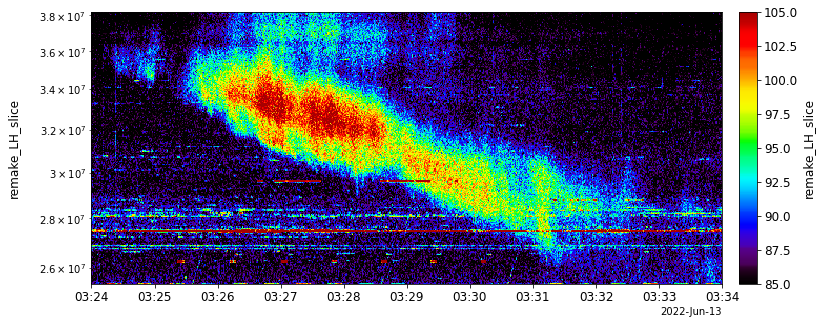

In [4]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))

print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[85, 105]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:24:00", "2022-06-13 03:34:00")
pytplot.tplot('remake_LH_slice')

### 1日平均で割る

n_min = 530 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(29968262., dtype=float32)
Coordinates:
    spec_bins  float32 4B 2.997e+07
    v          float32 4B 2.997e+07 

n_max = 750 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(36651612., dtype=float32)
Coordinates:
    spec_bins  float32 4B 3.665e+07
    v          float32 4B 3.665e+07 
 ---------------------------------- 



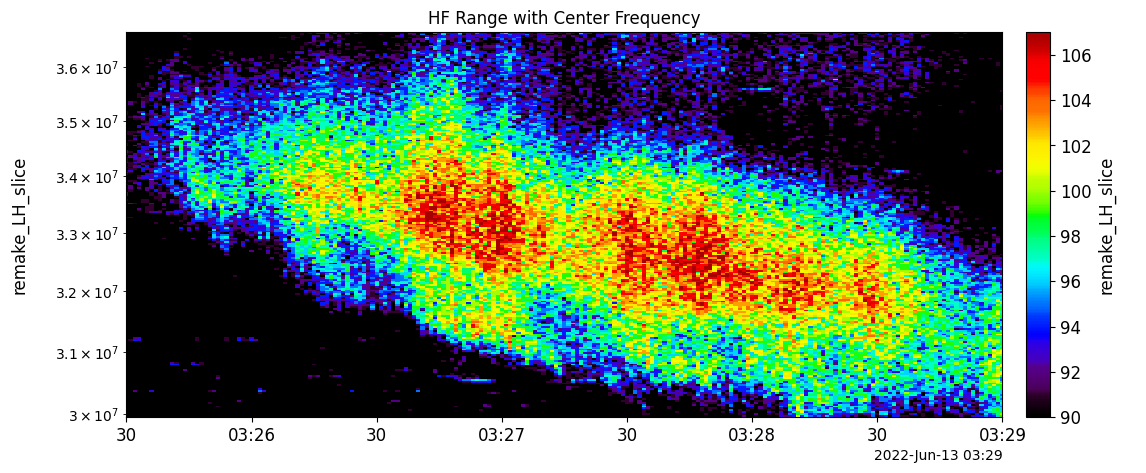

In [49]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))



print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': (data_index), 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[90, 107]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:25:30", "2022-06-13 03:29:00")

pytplot.tplot('remake_LH_slice')

In [2]:
# data_index = data_quants["LH"]に含まれている要素のうち，個数が最大の値を取得
max_value = data_quants['LH'].values.flatten().tolist()
max_count = max(set(max_value), key=max_value.count)
max_count

87

In [ ]:
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))


## 中心周波数(閾値あり)をoverplot

n_min = 530 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(29968262., dtype=float32)
Coordinates:
    spec_bins  float32 4B 2.997e+07
    v          float32 4B 2.997e+07 

n_max = 750 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(36651612., dtype=float32)
Coordinates:
    spec_bins  float32 4B 3.665e+07
    v          float32 4B 3.665e+07 
 ---------------------------------- 



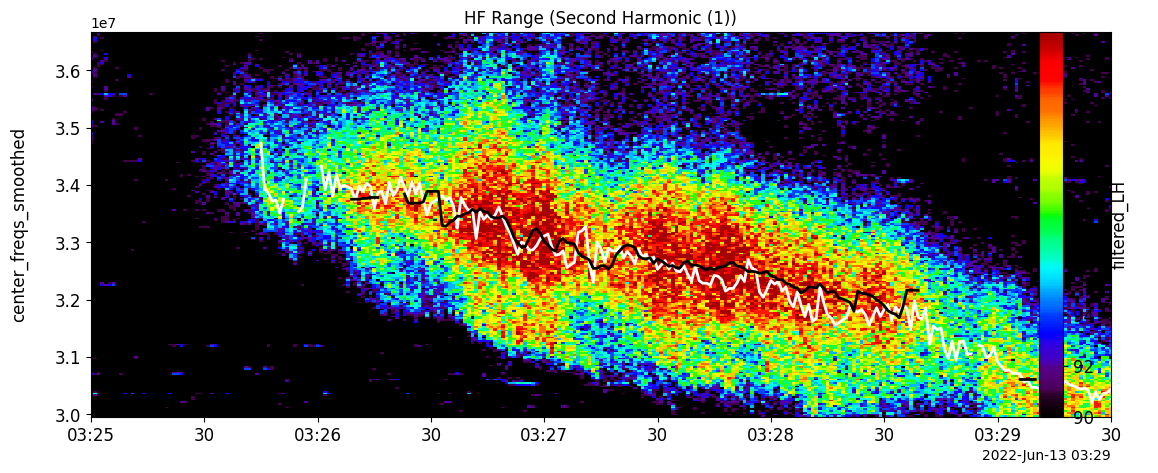

In [7]:
import numpy as np
import pytplot
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd  # 平滑化に使用

# n_min, n_maxの設定
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

# データを取得
data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))

# v_dim_sliceのフィルタリング
threshold = 105

v_dim_slice_filtered = data_index.where(data_index >= threshold, np.nan)
print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')

# 時間を調整（必要に応じてサブサンプリングなどの処理）
time_resampled = time[::int(len(time)/len(v_dim_slice_filtered))]  # 時間のサブサンプリング

# 時間ごとに連続する周波数範囲を探し、その中心周波数を計算する関数
def find_center_frequencies(v_dim_slice_filtered, freq_bins):
    center_frequencies = []
    for i in range(v_dim_slice_filtered.shape[0]):
        valid_freqs = freq_bins.where(~np.isnan(v_dim_slice_filtered[i]), drop=True)
        if len(valid_freqs) > 0:
            min_freq = valid_freqs.min().item()
            max_freq = valid_freqs.max().item()
            center_freq = (min_freq + max_freq) / 2
            center_frequencies.append(center_freq)
        else:
            center_frequencies.append(np.nan)
    return np.array(center_frequencies)

# 中心周波数の計算
center_frequencies = find_center_frequencies(v_dim_slice_filtered, v_dim_slice)

# 移動平均を計算（平滑化）: 窓サイズを5に設定
window_size = 5  # 窓サイズは調整可能
center_frequencies_smoothed = pd.Series(center_frequencies).rolling(window=window_size, min_periods=1, center=True).mean().to_numpy()

# tplot用のデータを生成
pytplot.store_data('filtered_LH', data={'x': time, 'y': data_index, 'v': v_dim_slice})

# 元の中心周波数と平滑化された中心周波数をプロットするためのデータをtplotに保存
pytplot.store_data('center_freqs', data={'x': time_resampled, 'y': center_frequencies})
pytplot.store_data('cernter_freqs_smoothed', data={'x': time_resampled, 'y': center_frequencies_smoothed})

# カラープロットのオプションを設定
pytplot.options('filtered_LH', opt_dict={'ylog': 1, 'zlog': 0, 'spec': 1, 'zrange': [90, 105]})
pytplot.options('center_freqs', opt_dict={'color': 'white', 'thick': 2, 'overplot': True})  # 元の中心周波数
pytplot.options('center_freqs_smoothed', opt_dict={'color': 'black', 'thick': 2, 'overplot': True})  # 平滑化された中心周波数

# プロット範囲を設定
pytplot.xlim("2022-06-13 03:25:00", "2022-06-13 03:29:30")


# 複数データをまとめる
# filtered_LH: スペクトルのカラープロット
# center_freqs: 元の中心周波数
# center_freqs_smoothed: 平滑化された中心周波数
pytplot.store_data('HF_range', data=['filtered_LH', 'center_freqs', 'center_freqs_smoothed'])


# プロットを描画
pytplot.tplot("HF_range")
pytplot.tplot_options('title', 'HF Range (Second Harmonic (1))')

n_min = 530 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(29968262., dtype=float32)
Coordinates:
    spec_bins  float32 4B 2.997e+07
    v          float32 4B 2.997e+07 

n_max = 750 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(36651612., dtype=float32)
Coordinates:
    spec_bins  float32 4B 3.665e+07
    v          float32 4B 3.665e+07 
 ---------------------------------- 



13-Sep-24 16:42:23: Unknown option supplied: wlabel
13-Sep-24 16:42:23: Unknown option supplied: ylabel


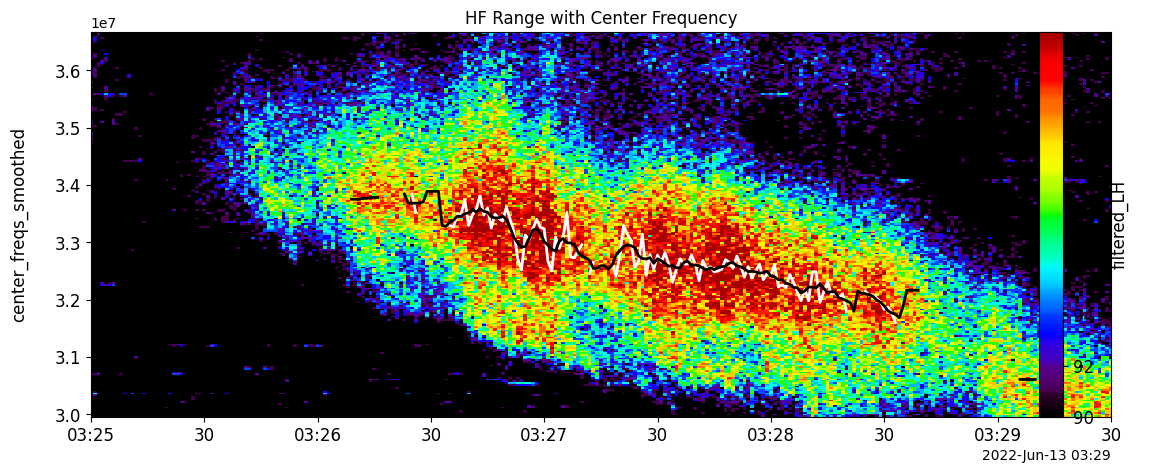

In [17]:
import numpy as np
import pytplot
import pandas as pd  # 平滑化に使用

# n_min, n_maxの設定
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

# データを取得
data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))

# v_dim_sliceのフィルタリング
threshold = 105
v_dim_slice_filtered = data_index.where(data_index >= threshold, np.nan)
print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')

# 時間を調整
time_resampled = time[::int(len(time)/len(v_dim_slice_filtered))]  # サブサンプリング

# 中心周波数の計算
def find_center_frequencies(v_dim_slice_filtered, freq_bins):
    center_frequencies = []
    for i in range(v_dim_slice_filtered.shape[0]):
        valid_freqs = freq_bins.where(~np.isnan(v_dim_slice_filtered[i]), drop=True)
        if len(valid_freqs) > 0:
            min_freq = valid_freqs.min().item()
            max_freq = valid_freqs.max().item()
            center_freq = (min_freq + max_freq) / 2
            center_frequencies.append(center_freq)
        else:
            center_frequencies.append(np.nan)
    return np.array(center_frequencies)

center_frequencies = find_center_frequencies(v_dim_slice_filtered, v_dim_slice)

# 移動平均を計算（平滑化）: 窓サイズを5に設定
window_size = 5
center_frequencies_smoothed = pd.Series(center_frequencies).rolling(window=window_size, min_periods=1, center=True).mean().to_numpy()

# tplot用のデータを生成
pytplot.store_data('filtered_LH', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('filtered_LH', opt_dict={'ylog': 1, 'zlog': 0, 'spec': 1, 'zrange': [90, 105]})

# 元の中心周波数と平滑化された中心周波数をプロットするためのデータをtplotに保存
pytplot.store_data('center_freqs', data={'x': time_resampled, 'y': center_frequencies})
pytplot.options('center_freqs', opt_dict={'color': 'white', 'thick': 2, 'overplot': True})

# 平滑化された中心周波数
pytplot.store_data('center_freqs_smoothed', data={'x': time_resampled, 'y': center_frequencies_smoothed})
pytplot.options('center_freqs_smoothed', opt_dict={'color': 'black', 'thick': 2, 'overplot': True})  

# タイトルと軸ラベルの設定
pytplot.tplot_options('title', 'HF Range with Center Frequency')
pytplot.tplot_options('wlabel', 'Time (UT)')   # x軸ラベル
pytplot.tplot_options('ylabel', 'Frequency (Hz)')   # y軸ラベル

# プロット範囲を設定
pytplot.xlim("2022-06-13 03:25:00", "2022-06-13 03:29:30")

# 複数データをまとめる
pytplot.store_data('HF_range', data=['filtered_LH', 'center_freqs', 'center_freqs_smoothed'])

# プロットを描画
pytplot.tplot("HF_range")


### Matpltlibで描画

In [1]:
import numpy as np
import cdflib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# CDFファイルのパス
file_path_1 = "it_h1_hf_20220613_v01.cdf"

# CDFファイルを読み込み
cdf_file = cdflib.CDF(file_path_1)

# データの読み込み
epoch = cdf_file.varget('Epoch')  # 時間
frequency = cdf_file.varget('Frequency')  # 周波数
lh_data = cdf_file.varget('LH')  # パワーフラックス密度

# Epochを人間が読める形式に変換（秒単位の数値からdatetime64に変換）
time = pd.to_datetime(epoch, unit='ns', origin='unix')

Epochの最小値: 63822297600000.0
Epochの最大値: 63822383999000.0
最初の時間: 2022-06-13 00:00:00
最後の時間: 2022-06-13 23:59:59


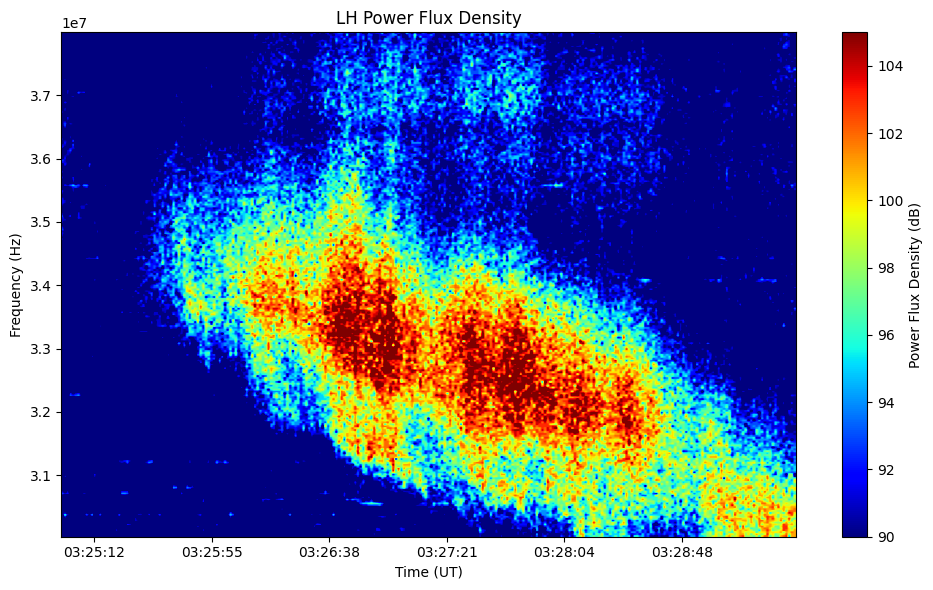

In [26]:
# スライスしたい時間と周波数の範囲を指定
start_time = np.datetime64('2022-06-13T03:25:00')
end_time = np.datetime64('2022-06-13T03:29:30')

# ユーザーに周波数範囲を入力してもらう
start_frequency = int(input("min_frequency [MHz] = ")) * 1e6
end_frequency = int(input("MAX_frequency [MHz] = ")) * 1e6

# CDFファイルのパス
file_path_1 = "it_h1_hf_20220613_v01.cdf"

# CDFファイルを読み込み
cdf_file = cdflib.CDF(file_path_1)

# データの読み込み
epoch = cdf_file.varget('Epoch')  # 時間
frequency = cdf_file.varget('Frequency')  # 周波数
lh_data = cdf_file.varget('LH')  # パワーフラックス密度

# Epochの最小値と最大値を確認
print(f"Epochの最小値: {epoch[0]}")
print(f"Epochの最大値: {epoch[-1]}")

# Epochのスケールを確認して、適切なスケールで時間に変換します
# ここでは、仮にミリ秒単位で記録されていると仮定します
base_time = pd.Timestamp('2022-06-13 00:00:00')
time = base_time + pd.to_timedelta(epoch - epoch[0], unit='ms')

# 時間データの範囲を確認
print(f"最初の時間: {time[0]}")
print(f"最後の時間: {time[-1]}")

# 時間範囲でデータをスライス
time_mask = (time >= start_time) & (time <= end_time)
if not time_mask.any():
    raise ValueError("指定された時間範囲にデータが存在しません。")

lh_data_sliced = lh_data[time_mask, :]  # 時間でスライス
time_sliced = time[time_mask]  # 時間もスライス

# 周波数範囲でデータをスライス
freq_mask = (frequency >= start_frequency) & (frequency <= end_frequency)
if not freq_mask.any():
    raise ValueError("指定された周波数範囲にデータが存在しません。")

lh_data_sliced = lh_data_sliced[:, freq_mask]  # 周波数でスライス
frequency_sliced = frequency[freq_mask]  # 周波数もスライス

# カラープロットの作成
fig, ax = plt.subplots(figsize=(10, 6))

# カラープロットの設定
extent = [mdates.date2num(time_sliced[0]), mdates.date2num(time_sliced[-1]), frequency_sliced[0], frequency_sliced[-1]]
img = ax.imshow(lh_data_sliced.T, aspect='auto', origin='lower', extent=extent, cmap='jet', vmin=90, vmax=105)

# カラーバーの追加
cbar = plt.colorbar(img, ax=ax)
cbar.set_label('Power Flux Density (dB)')

# 軸ラベルとタイトル
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('LH Power Flux Density')

# 時間軸のフォーマット設定
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.set_xlim(mdates.date2num(np.datetime64(start_time)), mdates.date2num(np.datetime64(end_time)))

# レイアウトの調整
plt.tight_layout()

# プロットの表示
plt.show()


# ノイズ軽減

 ## 移動平均

n_min = 400 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(26000976., dtype=float32)
Coordinates:
    spec_bins  float32 4B 2.6e+07
    v          float32 4B 2.6e+07 

n_max = 800 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(38177492., dtype=float32)
Coordinates:
    spec_bins  float32 4B 3.818e+07
    v          float32 4B 3.818e+07 
 ---------------------------------- 



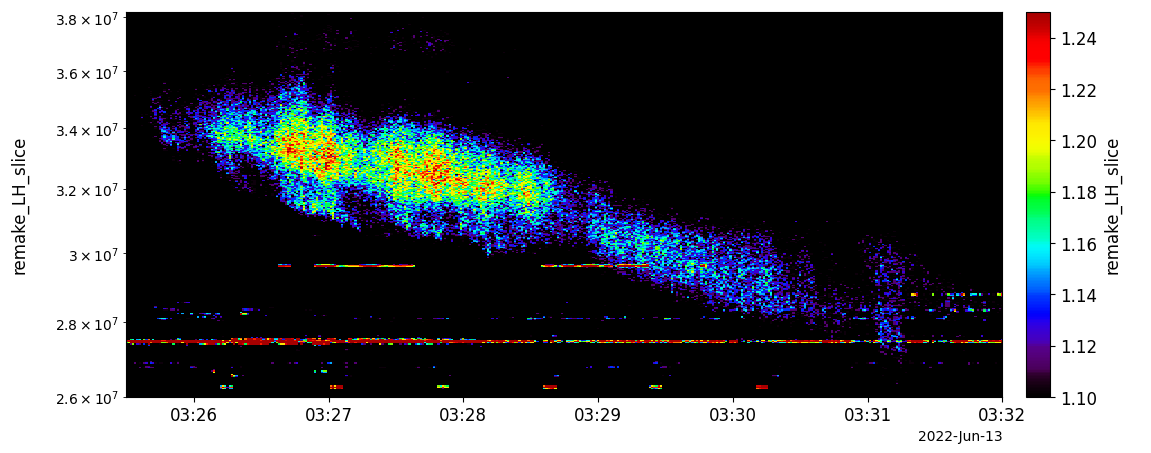

In [3]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))


print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index/87, 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[1.10, 1.25]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:25:30", "2022-06-13 03:32:00")

pytplot.tplot('remake_LH_slice')

n_min = 400 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(26000976., dtype=float32)
Coordinates:
    spec_bins  float32 4B 2.6e+07
    v          float32 4B 2.6e+07 

n_max = 800 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(38177492., dtype=float32)
Coordinates:
    spec_bins  float32 4B 3.818e+07
    v          float32 4B 3.818e+07 
 ---------------------------------- 



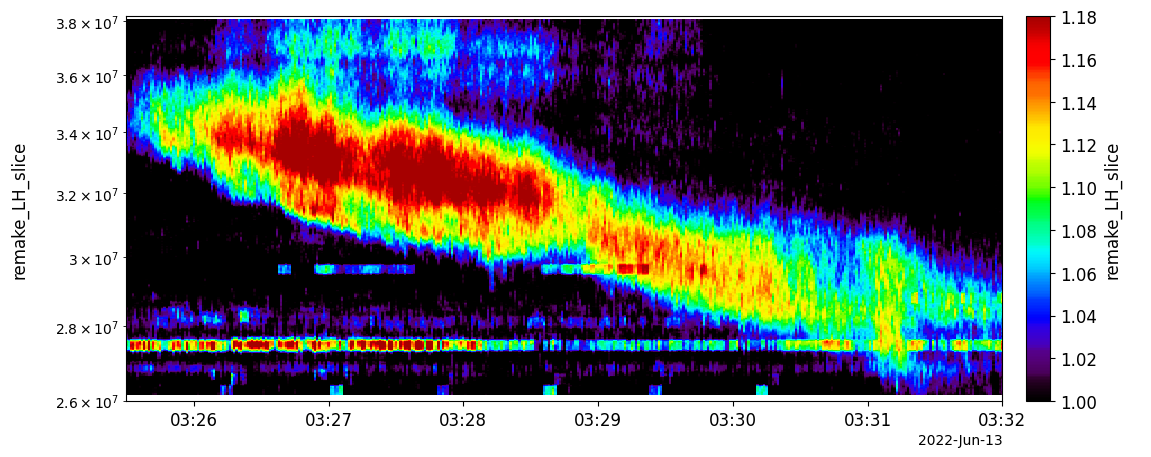

In [2]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))

# data_indexの移動平均をとる
data_index = data_index.rolling(v_dim=10, center=True).mean()


print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index/87, 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[1.05, 1.18]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:25:30", "2022-06-13 03:32:00")

pytplot.tplot('remake_LH_slice')

### 移動平均フィルタ

最も簡単なノイズ削減方法の1つは、移動平均やスムージングフィルタをデータに適用することです。これにより高周波ノイズを軽減できます。

細かいディティールがぼやける可能性がある

n_min = 400 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(26000976., dtype=float32)
Coordinates:
    spec_bins  float32 4B 2.6e+07
    v          float32 4B 2.6e+07 

n_max = 800 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(38177492., dtype=float32)
Coordinates:
    spec_bins  float32 4B 3.818e+07
    v          float32 4B 3.818e+07 
 ---------------------------------- 



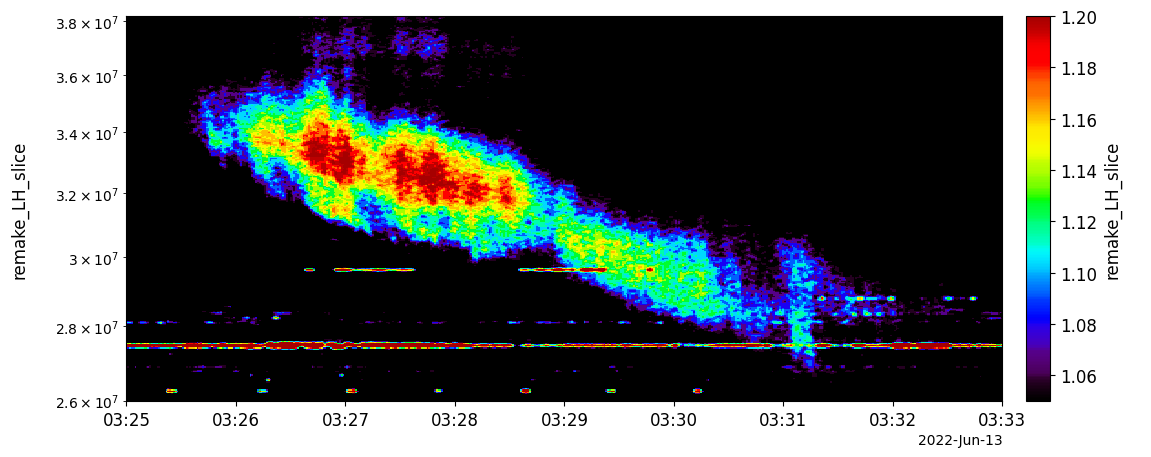

In [6]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))

# data_indexの移動平均をとる
smoothed_data_frequency = uniform_filter1d(data_index, size=3, axis=0)
smoothed_data = uniform_filter1d(smoothed_data_frequency, size=3, axis=1)

print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': smoothed_data/87, 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[1.05, 1.2]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:25:00", "2022-06-13 03:33:00")

pytplot.tplot('remake_LH_slice')

### メディアンフィルタ

メディアンフィルタはエッジを保ちつつノイズを削減するのに有効です。近傍要素の中央値に置き換えるため、外れ値のノイズを抑えることができます。

n_min = 400 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(26000976., dtype=float32)
Coordinates:
    spec_bins  float32 4B 2.6e+07
    v          float32 4B 2.6e+07 

n_max = 800 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(38177492., dtype=float32)
Coordinates:
    spec_bins  float32 4B 3.818e+07
    v          float32 4B 3.818e+07 
 ---------------------------------- 



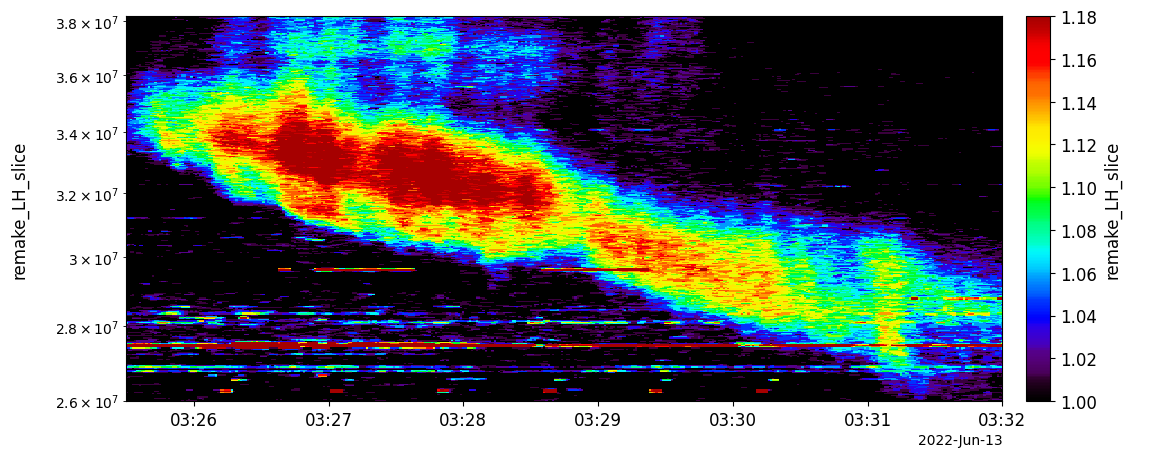

In [5]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))

print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')



smoothed_data_median = median_filter(data_index, size=(5, 1))

# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': (smoothed_data_median/87), 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[1.0, 1.18]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:25:30", "2022-06-13 03:32:00")

pytplot.tplot('remake_LH_slice')

### フーリエ変換(周波数領域フィルタリング)

より複雑なノイズパターンの場合，フーリエ変換を適用し，高周波ノイズ成分を除去してから逆変換を行う．

In [2]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))

print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# データにフーリエ変換を適用
data_fft = np.fft.fft2(data_index)

# 高周波成分をフィルタリングするマスクを定義（カットオフを適宜調整）
# フーリエスペクトルのエネルギー計算
energy = np.abs(data_fft)**2
total_energy = np.sum(energy)

# エネルギーの90%を占める周波数をカットオフ周波数として決定
cumulative_energy = np.cumsum(np.sort(energy.ravel()))
cutoff_index = np.searchsorted(cumulative_energy, 0.9 * total_energy)

# カットオフ周波数を設定
freq_cutoff = int(np.sqrt(cutoff_index))

rows, cols = data_index.shape
mask = np.ones((rows, cols))
mask[freq_cutoff:-freq_cutoff, freq_cutoff:-freq_cutoff] = 0  # 高周波をゼロに

# フーリエ変換データにマスクを適用
data_fft_filtered = data_fft * mask

# 逆フーリエ変換を適用し、フィルタリングされたデータを取得
smoothed_data_fourier = np.fft.ifft2(data_fft_filtered).real

# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': (smoothed_data_fourier/87), 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[1.0, 1.18]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:25:30", "2022-06-13 03:32:00")

pytplot.tplot('remake_LH_slice')

n_min = 400 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(26000976., dtype=float32)
Coordinates:
    spec_bins  float32 4B 2.6e+07
    v          float32 4B 2.6e+07 

n_max = 800 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(38177492., dtype=float32)
Coordinates:
    spec_bins  float32 4B 3.818e+07
    v          float32 4B 3.818e+07 
 ---------------------------------- 



# 密度モデルと一緒にプロット

密度モデル

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import sympy as sp

# Baumbach-Allen model
def baumbach_allen_model1(rho):
    return 1e8*(2.99*rho**(-16) + 1.55*rho**(-6))

def baumbach_allen_10_model(rho):
    return 10*1e8*(2.99*rho**(-16) + 1.55*rho**(-6))

def baumbach_allen_F_model(rho, factor):
    
    return factor*1e8*(2.99*rho**(-16) + 1.55*rho**(-6))


# 1xBaumbach-Allen modelを周波数に変換
def frequency(rho):
    electron = 1.60217662e-19    # 電気素量：C
    m_e = 9.10938356e-31         # 電子の質量：kg
    epsilon_0 = 8.854187817e-12  # 真空の誘電率：F/m
    
    frequency_Hz =  1/(2*np.pi)* np.sqrt(electron**2/(epsilon_0*m_e))*1e3*np.sqrt(baumbach_allen_model1(rho))
    frequency_MHz = frequency_Hz / 1e6
    return frequency_MHz


# 10xBaumbach-Allen modelを周波数に変換
def frequency_10(rho):
    electron = 1.60217662e-19    # 電気素量：C
    m_e = 9.10938356e-31         # 電子の質量：kg
    epsilon_0 = 8.854187817e-12  # 真空の誘電率：F/m
    
    frequency_Hz =  1/(2*np.pi)* np.sqrt(electron**2/(epsilon_0*m_e))*1e3*np.sqrt(baumbach_allen_10_model(rho))
    frequency_MHz = frequency_Hz / 1e6
    return frequency_MHz


# FxBaumbach-Allen modelを周波数に変換
def frequency_F(rho, factor):
    electron = 1.60217662e-19    # 電気素量：C
    m_e = 9.10938356e-31         # 電子の質量：kg
    epsilon_0 = 8.854187817e-12  # 真空の誘電率：F/m
   
   
    frequency_Hz =  1/(2*np.pi)* np.sqrt(electron**2/(epsilon_0*m_e))*1e3*np.sqrt(baumbach_allen_F_model(rho, factor))
    frequency_MHz = frequency_Hz / 1e6
    return frequency_MHz


# # 周波数の近似式
# def frequency(rho):
#     frequency_Hz = 9e3*np.sqrt(baumbach_allen_model1(rho))
#     frequency_MHz = frequency_Hz / 1e6
#     return frequency_MHz

# rho_symbol = sp.symbols('rho')
# rhoの範囲(Baumbach-Allen modelの定義域:>1.2R, 215R = 1AU)
# rho_value = np.arange(1.2, 215, 0.01)
# 太陽半径：km
R_sun = 696340
v_burst_1BA_1 = 199.713486
# v_burst_10BA_1 = 294.518445


delta_rho_1BA_1 = v_burst_1BA_1/R_sun




In [ ]:
np.mean(data_quants['LH'])

<xarray.DataArray 'LH' ()> Size: 8B
array(90.67749222)
Attributes:
    CDF:           {'VATT': {'CATDESC': 'Power Flux Density (LH)', 'DEPEND_0'...
    data_att:      {'coord_sys': '', 'units': 'dB', 'depend_1_units': 'Hz', '...
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

In [7]:
import pandas as pd
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))/np.mean(data_quants['LH'])
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))



print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
start_time = '2022-06-13 03:25:30'
end_time = "2022-06-13 03:32:00"
pytplot.xlim(start_time, end_time)
# for i in range()

pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index, 'v': v_dim_slice})
# 二次関数 (例: y = 0.1 * x^2) を追加
quadratic = 0.1 * time**2
pytplot.store_data('quadratic', data={'x': time, 'y': quadratic})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[1.0, 1.18]}) # z(強度)の分解能は1
pytplot.tplot(['remake_LH_slice',  'quadratic'])

n_min = 400 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(26000976., dtype=float32)
Coordinates:
    spec_bins  float32 4B 2.6e+07
    v          float32 4B 2.6e+07 

n_max = 800 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(38177492., dtype=float32)
Coordinates:
    spec_bins  float32 4B 3.818e+07
    v          float32 4B 3.818e+07 
 ---------------------------------- 



TypeError: ufunc 'square' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [18]:
data_index

<xarray.DataArray 'LH' (time: 86400, v_dim: 400)> Size: 276MB
array([[0.98150046, 0.99252855, 0.98150046, ..., 0.90430379, 0.90430379,
        0.90430379],
       [1.01458474, 0.98150046, 0.97047236, ..., 0.92635998, 0.92635998,
        0.90430379],
       [0.98150046, 0.98150046, 0.98150046, ..., 0.8932757 , 0.91533189,
        0.94841617],
       ...,
       [1.05869712, 0.97047236, 0.99252855, ..., 0.92635998, 0.91533189,
        0.91533189],
       [0.99252855, 0.98150046, 0.98150046, ..., 0.90430379, 0.90430379,
        0.92635998],
       [0.98150046, 0.97047236, 1.00355665, ..., 0.94841617, 0.95944427,
        0.94841617]])
Coordinates:
  * time       (time) datetime64[ns] 691kB 2022-06-13 ... 2022-06-13T23:59:59
    spec_bins  (v_dim) float32 2kB 2.6e+07 2.603e+07 ... 3.815e+07 3.818e+07
    v          (v_dim) float32 2kB 2.6e+07 2.603e+07 ... 3.815e+07 3.818e+07
Dimensions without coordinates: v_dim
Attributes:
    CDF:           {'VATT': {'CATDESC': 'Power Flux Density (LH)', 'DEPEND_0'...
    data_att:      {'coord_sys': '', 'units': 'dB', 'depend_1_units': 'Hz', '...
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

# Fundamental

In [7]:
# Fundamental frequency

## Fundamental

n_min = 10 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(14099121., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.41e+07
    v          float32 4B 1.41e+07 

n_max = 140 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(18035888., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.804e+07
    v          float32 4B 1.804e+07 
 ---------------------------------- 



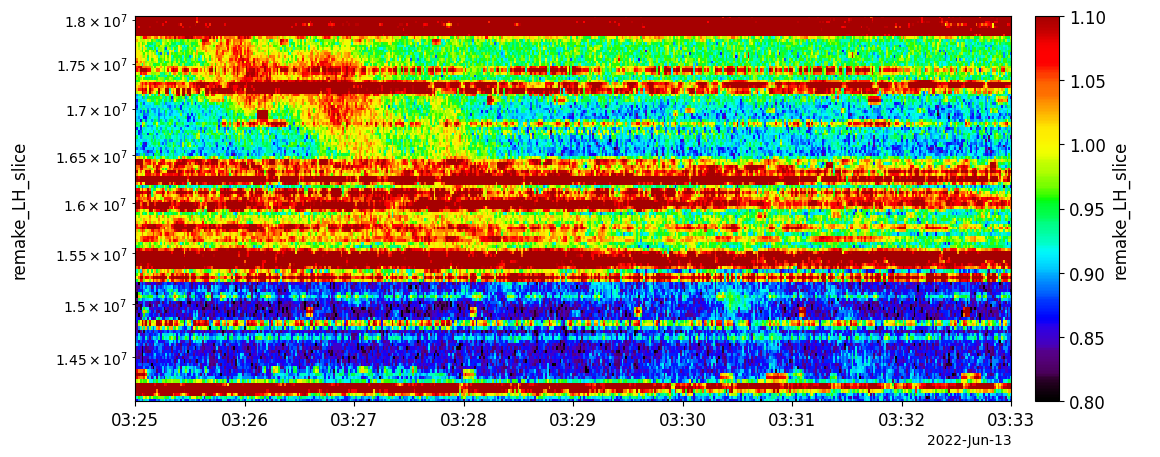

In [3]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))



print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index/np.mean(data_quants['LH']), 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[0.8, 1.1]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:25:00", "2022-06-13 03:33:00")

pytplot.tplot('remake_LH_slice')

### 前半

n_min = 85 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(16387939., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.639e+07
    v          float32 4B 1.639e+07 

n_max = 135 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(17883300., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.788e+07
    v          float32 4B 1.788e+07 
 ---------------------------------- 



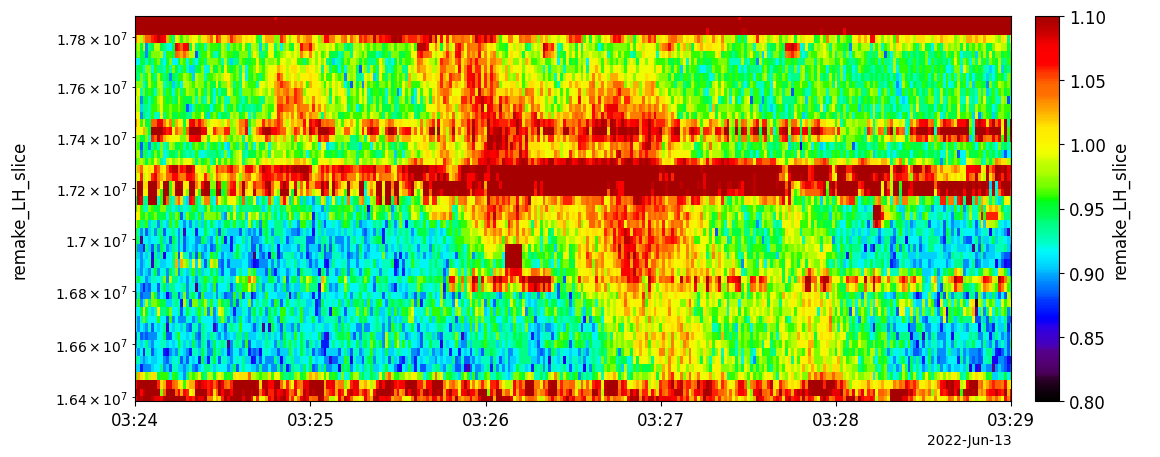

In [9]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))



print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index/np.mean(data_quants['LH']), 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[0.8, 1.1]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:24:00", "2022-06-13 03:29:00")

pytplot.tplot('remake_LH_slice')

### 後半

n_min = 10 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(14099121., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.41e+07
    v          float32 4B 1.41e+07 

n_max = 50 = <xarray.DataArray 'spec_bins' ()> Size: 4B
array(15289307., dtype=float32)
Coordinates:
    spec_bins  float32 4B 1.529e+07
    v          float32 4B 1.529e+07 
 ---------------------------------- 



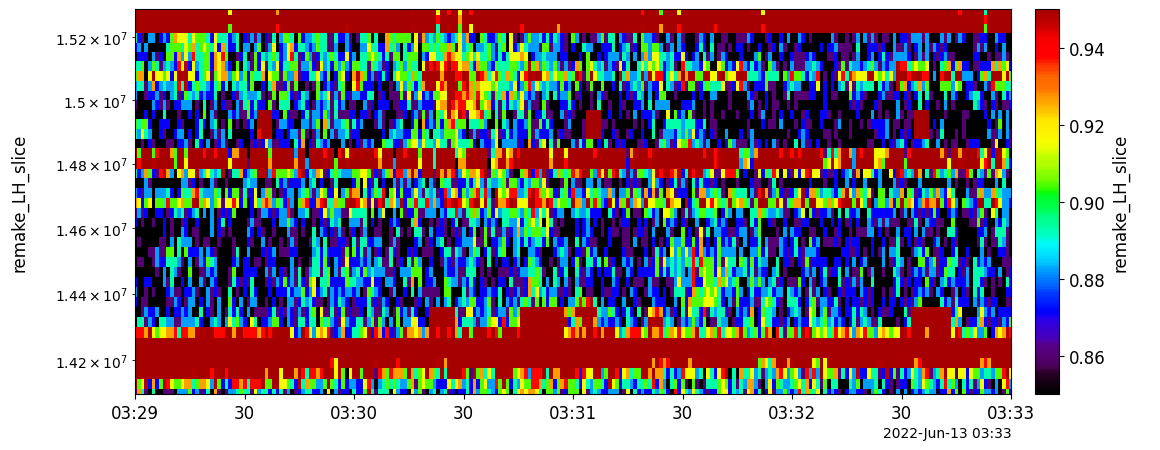

In [13]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))

data_index = data_quants["LH"].sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))



print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index/np.mean(data_quants['LH']), 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[0.85, 0.95]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:29:00", "2022-06-13 03:33:00")

pytplot.tplot('remake_LH_slice')